In [2]:
import pandas as pd


In [3]:

# Chargement des données des prénoms
df_prenoms = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/firstname_with_sex.csv', sep=';')

# Chargement des transcriptions
df_transcriptions = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/transcriptions_with_sex.csv')


In [4]:
df_prenoms.head()


,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


In [27]:
print(df_prenoms.shape , df_transcriptions.shape)

(6946, 5) (241, 6)


In [5]:
df_transcriptions.head()


,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [9]:

# Set the display option to print the entire line
pd.set_option('display.max_colwidth', None)

# Print the first line of df_transcriptions
df_transcriptions.iloc[0,:]


subject_line                                       ebb26ada-044c-4c62-9dbc-a9c8d505d31c
groundtruth     surname: Chardon firstname: Marie occupation: idem link: fille age: 30 
prediction            nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: " 
sex                                                                               femme
Name: 0, dtype: object

In [10]:
# Probalité des sexes des prénoms
df_prenoms['total'] = df_prenoms['male'] + df_prenoms['female']
df_prenoms['gender_probability'] = df_prenoms['female'] / df_prenoms['total']

In [17]:
def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            return parts[i+1]  # Retourne le prénom qui suit ces indicateurs
    return None

df_transcriptions['extracted_firstname'] = df_transcriptions['groundtruth'].apply(extract_firstname)
df_transcriptions['extracted_firstname'] = df_transcriptions['extracted_firstname'].str.lower()


# Standardisation de la colonne 'sex' en binaire
df_transcriptions['sex_binary'] = df_transcriptions['sex'].apply(lambda x: 1 if x == 'femme' else 0)


In [18]:
df_transcriptions.head()

,subject_line,groundtruth,prediction,sex,extracted_firstname,sex_binary
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,1
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,0
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,1
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny,nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: '',femme,marie,1
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: 78 lieux_naissance: id relation: '',femme,marguerite,1


In [19]:
# Fusion basée sur les prénoms extraits
df_combined = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname',
                       right_on='firstname',
                       how='left')




In [20]:
df_combined.head()

,subject_line,groundtruth,prediction,sex,extracted_firstname,sex_binary,firstname,gender_probability
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,1,marie,0.995774
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,0,NaN,NaN
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,1,marie,0.995774
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny,nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: '',femme,marie,1,marie,0.995774
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: 78 lieux_naissance: id relation: '',femme,marguerite,1,marguerite,0.998233


In [26]:
df_combined.shape

(241, 8)

In [21]:
# Baseline pour les valeurs manquantes
df_combined['gender_probability'].fillna(0.5, inplace=True)


In [22]:
# Première modélisation

from sklearn.model_selection import train_test_split


X = df_combined[['gender_probability']]  
y = df_combined['sex_binary']

# Division en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


((241, 1), (241,))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
import seaborn as sns

# Création et entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))


import matplotlib.pyplot as plt

# Calculate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Extract the values
true_positives = report['1']['precision'] * report['1']['support']
false_positives = (1 - report['1']['precision']) * report['0']['support']
true_negatives = report['0']['precision'] * report['0']['support']
false_negatives = (1 - report['0']['precision']) * report['1']['support']

# Create a 2x2 heatmap
data = [[true_positives, false_positives], [false_negatives, true_negatives]]
sns.heatmap(data, annot=True, fmt=".0f", cmap="Blues")

# Set the axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        23

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



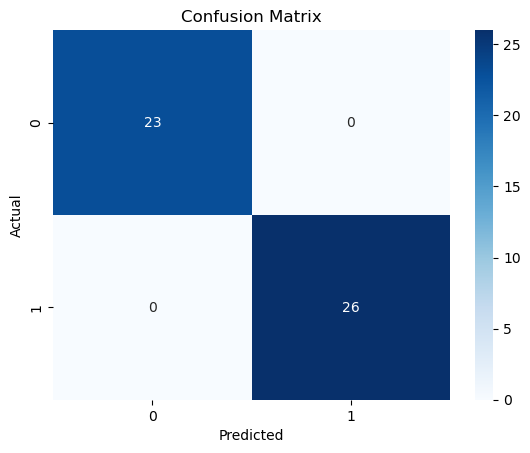

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Extract the values
true_positives = report['1']['precision'] * report['1']['support']
false_positives = (1 - report['1']['precision']) * report['0']['support']
true_negatives = report['0']['precision'] * report['0']['support']
false_negatives = (1 - report['0']['precision']) * report['1']['support']

# Create a 2x2 heatmap
data = [[true_positives, false_positives], [false_negatives, true_negatives]]
sns.heatmap(data, annot=True, fmt=".0f", cmap="Blues")

# Set the axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title
plt.title('Confusion Matrix')

# Show the plot
plt.show()